In [1]:
#Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import sys
import xarray as xr
import pandas as pd

#open the files
discharge= pd.read_csv('discharge_daily.tss', delimiter=r'\s+', skiprows=5,header=None)
discharge_annual=xr.open_dataset('discharge_annualtot.nc', decode_times=False)
runoff= xr.open_dataset('runoff_annualtot.nc', decode_times=False)
totalet= xr.open_dataset('totalET_annualtot.nc', decode_times=False)
precipitation= xr.open_dataset('Precipitation_annualtot.nc', decode_times=False)
print(discharge)

         0        1        2
0      366  2106.22  77.8551
1      367  1900.71  67.9360
2      368  1719.28  59.3912
3      369  1559.80  52.0438
4      370  1423.00  45.7495
...    ...      ...      ...
1091  1457  1593.41  84.5244
1092  1458  1498.46  81.3164
1093  1459  1411.83  78.6351
1094  1460  1369.00  84.9714
1095  1461  1381.25  84.5991

[1096 rows x 3 columns]


In [2]:
#Create a new column for discharge with dates 
discharge['date'] = pd.date_range(start='1/1/2004', periods=len(discharge), freq='D')
discharge.columns = ['Datez','discharge_loc1','discharge_loc2', 'date']
discharge = discharge.drop(columns=['Datez'])
discharge.set_index('date', inplace=True)
discharge

,discharge_loc1,discharge_loc2
date,,
2004-01-01,2106.22,77.8551
2004-01-02,1900.71,67.9360
2004-01-03,1719.28,59.3912
2004-01-04,1559.80,52.0438
2004-01-05,1423.00,45.7495
...,...,...
2006-12-27,1593.41,84.5244
2006-12-28,1498.46,81.3164
2006-12-29,1411.83,78.6351


<Figure size 2000x1000 with 0 Axes>

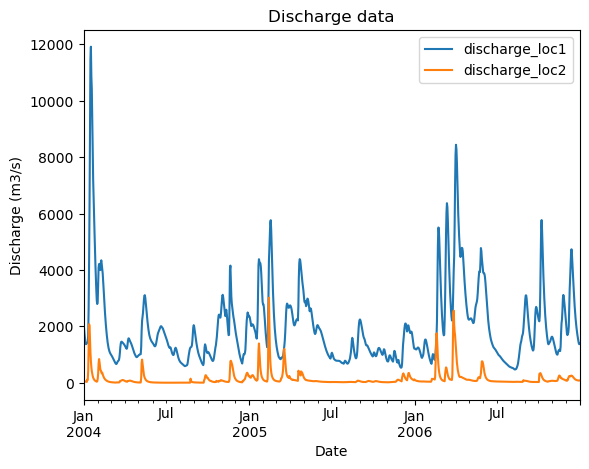

In [3]:
#plot the discharge data in one plot
plt.figure(figsize=(20,10))
discharge.plot()
plt.title('Discharge data')
plt.xlabel('Date')
plt.ylabel('Discharge (m3/s)')
plt.show()


In [4]:
#Get lat and lon from the runoff xarray
run_lat = runoff['lat'].values
run_lon = runoff['lon'].values
runof=np.array(runoff.variables['runoff_annualtot'])


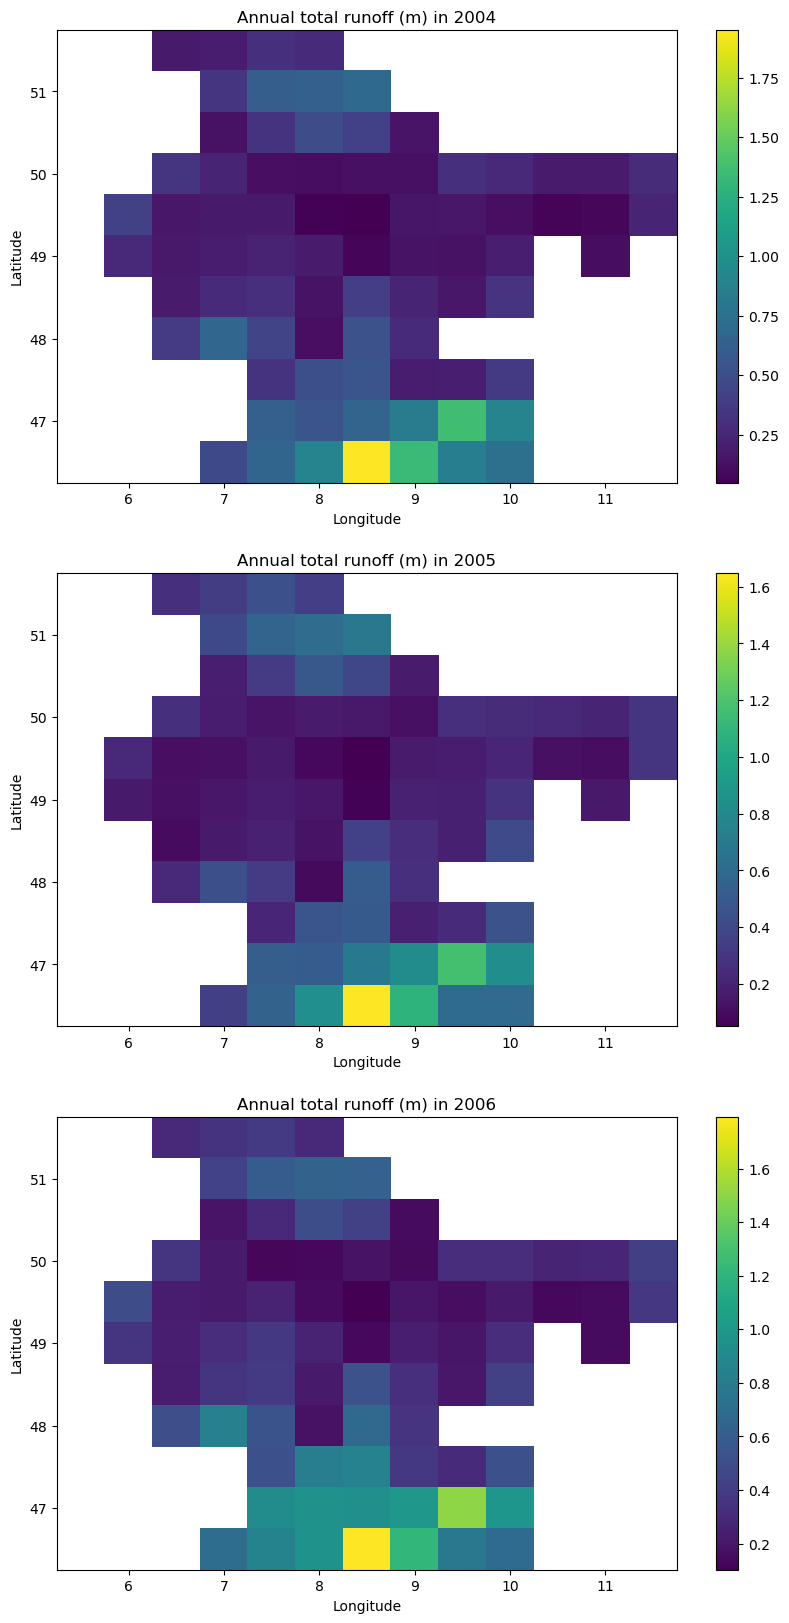

In [5]:
plt.figure(figsize=(10,20))
year=[2004,2005,2006]
#plot the annual total runoff as a loop through first dimension
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.pcolormesh(run_lon,run_lat,runof[i,:,:])
    plt.colorbar()
    plt.title('Annual total runoff (m) in '+str(year[i]))
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
#plt.pcolormesh(lon,lat,runof[0,:,:])
#plt.colorbar()
#plt.title('Annual total runoff')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
#plt.show()

In [6]:
#Get lat and lon from the ET xarray
et_lat = totalet['lat'].values
et_lon = totalet['lon'].values
t_et=np.array(totalet.variables['totalET_annualtot'])


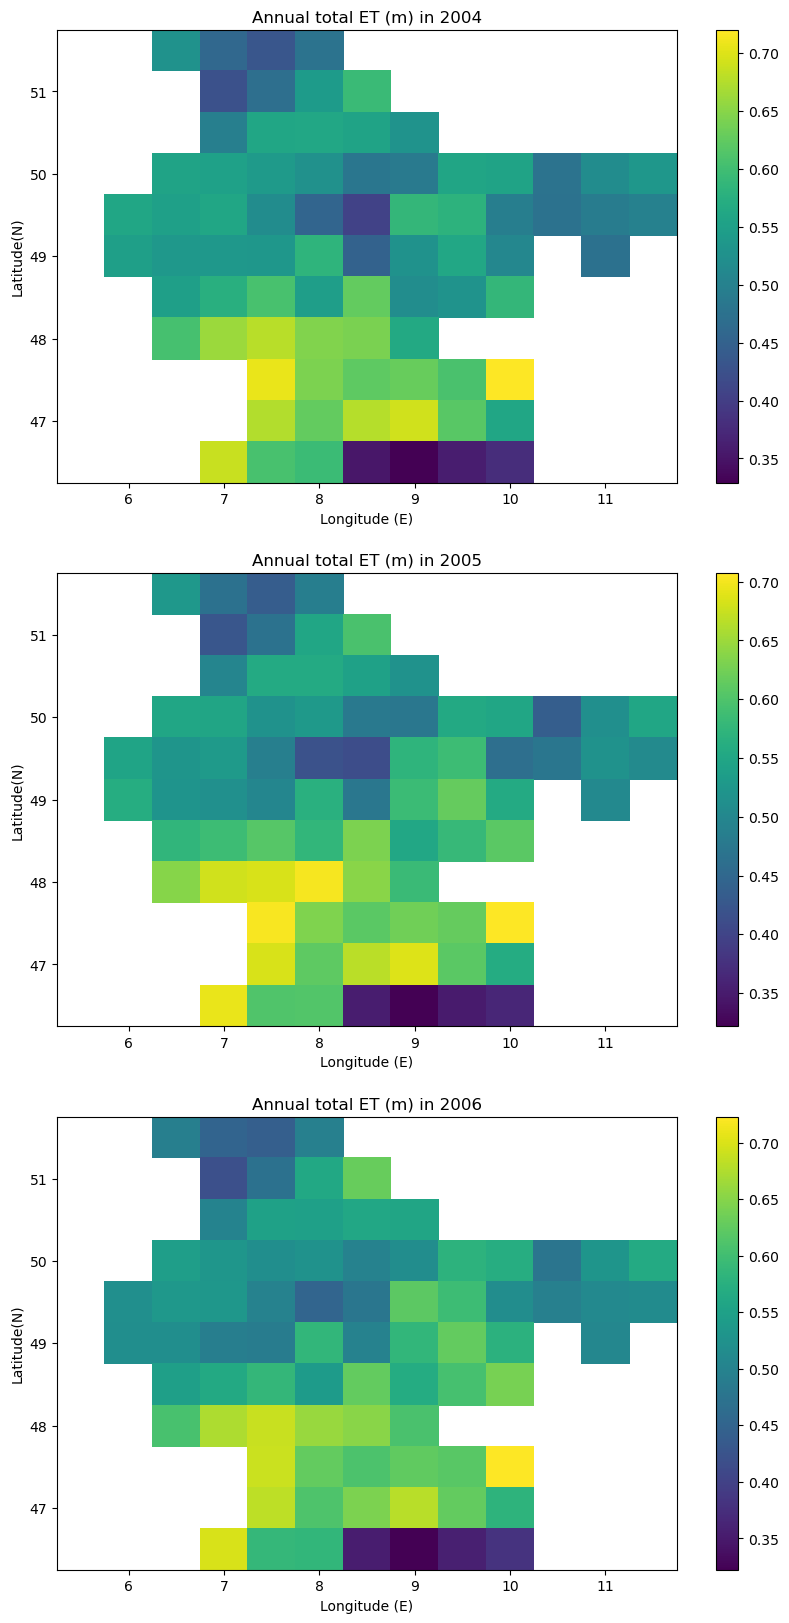

In [7]:
plt.figure(figsize=(10,20))
year=[2004,2005,2006]
#plot the annual total ET as a loop through first dimension
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.pcolormesh(et_lon,et_lat,t_et[i,:,:])
    plt.colorbar()
    plt.title('Annual total ET (m) in '+str(year[i]))
    plt.xlabel('Longitude (E)')
    plt.ylabel('Latitude(N)')
#plt.pcolormesh(lon,lat,runof[0,:,:])
#plt.colorbar()
#plt.title('Annual total runoff')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
#plt.show()

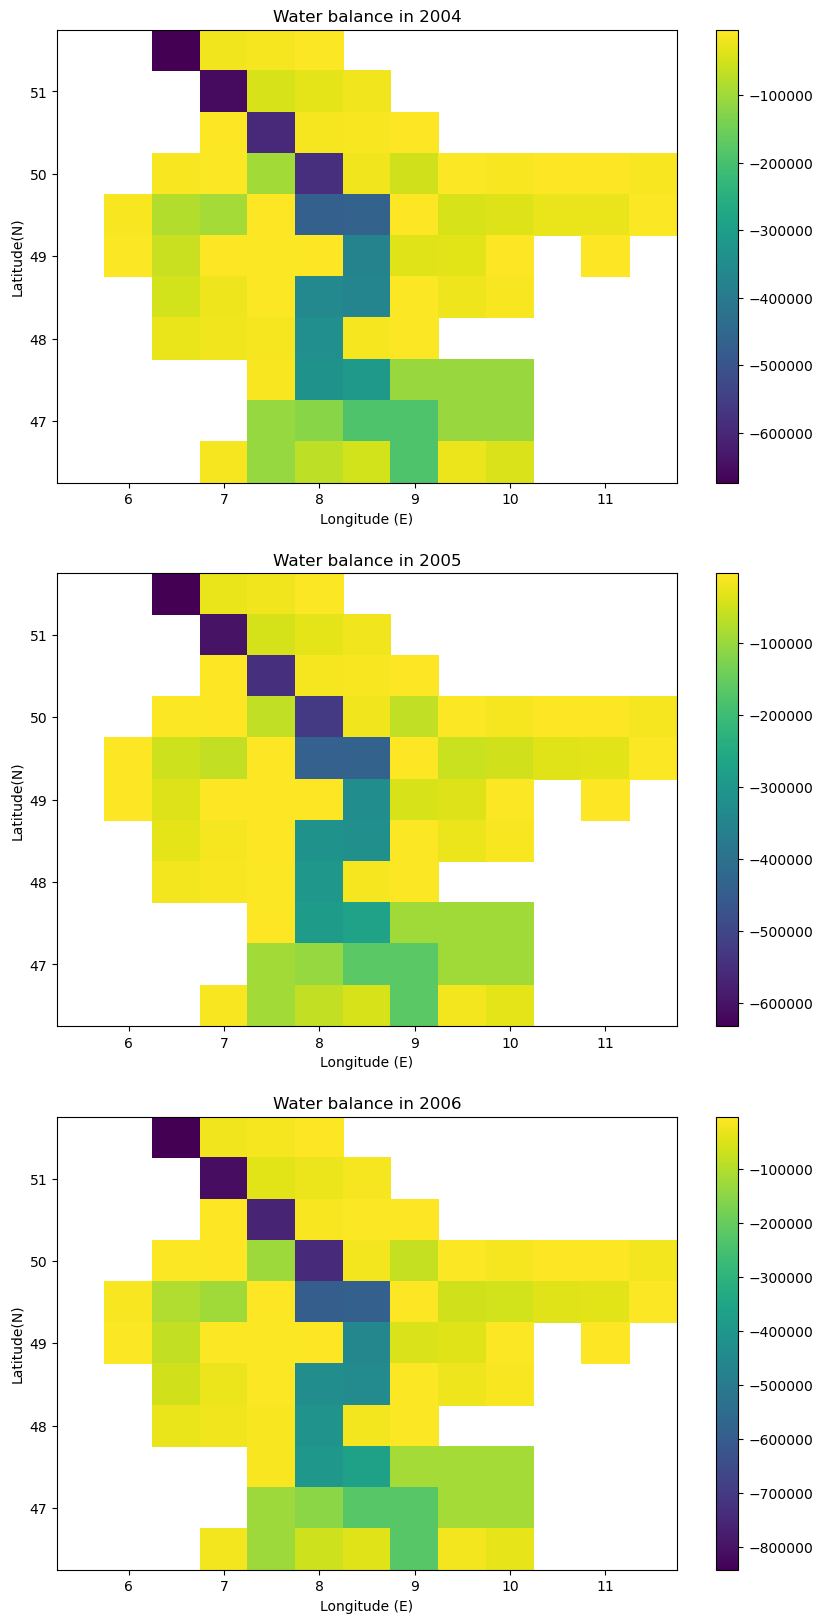

In [8]:
#Calculate water balance using ET, discharge_annual, and precipitation and plot the water balance like in the plots above
#Discharge
#discharge_annual=xr.open_dataset('discharge_annualtot.nc', decode_times=False)
discharge_lat = discharge_annual['lat'].values
discharge_lon = discharge_annual['lon'].values
discharge_ann=np.array(discharge_annual.variables['discharge_annualtot'])

#Precipitation
prec_lat = precipitation['lat'].values
prec_lon = precipitation['lon'].values
precip=np.array(precipitation.variables['Precipitation_annualtot'])



#Water balance
wb= precip - discharge_ann - t_et

plt.figure(figsize=(10,20))
year=[2004,2005,2006]
#plot the water balance as a loop through first dimension
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.pcolormesh(prec_lon,prec_lat,wb[i,:,:])
    plt.colorbar()
    plt.title('Water balance in '+str(year[i]))
    plt.xlabel('Longitude (E)')
    plt.ylabel('Latitude(N)')


